<a href="https://colab.research.google.com/github/hanyuc37/stc510/blob/main/Module_3_Essential_Hanyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Based on the Crime data in Phoenix. I'm going to observe the police office location and phoenix unemployment and see if there is any correlation between them

In [260]:
crime = pd.read_csv("/content/drive/MyDrive/STC 510/Module 3 Project /Phoenix.csv",error_bad_lines=False, engine ='python')
unemployment = pd.read_csv("/content/drive/MyDrive/STC 510/Module 3 Project /phoenix_unemployment.csv")
police = pd.read_csv("/content/drive/MyDrive/STC 510/Module 3 Project /Police Office.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 131678: unexpected end of data


In [261]:
unemployment.head() # year/month

,series_id,city,state,year,month,unemployment_rate
0,LAUCT045500000000003,Phoenix,AZ,1990,1,5.0
1,LAUCT045500000000003,Phoenix,AZ,1990,2,4.7
2,LAUCT045500000000003,Phoenix,AZ,1990,3,4.7
3,LAUCT045500000000003,Phoenix,AZ,1990,4,4.7
4,LAUCT045500000000003,Phoenix,AZ,1990,5,4.6


In [262]:
crime.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


In [263]:
police.head() # Zipcode

,X,Y,PlaceName,AddressFull,AddressCity,AddressState,AddressZip,PlaceType,PlaceWeb,DegreesX,DegreesY,PlaceAccess,OBJECTID,PlaceStatus
0,-112.081994,33.448525,Phoenix Police Headquarters,620 W WASHINGTON ST,PHOENIX,AZ,85003,POLICE STATION,https://www.phoenix.gov/police,-112.081994,33.448525,PUBLIC,30,OPEN
1,-112.143411,33.597083,Cactus Park Precinct,12220 N 39TH AVE,PHOENIX,AZ,85029,POLICE STATION,https://www.phoenix.gov/police/precincts/cactu...,-112.143411,33.597083,PUBLIC,233,OPEN
2,-112.049179,33.429311,Central City Precinct,1902 S 16TH ST,PHOENIX,AZ,85034,POLICE STATION,https://www.phoenix.gov/police/precincts/centr...,-112.049179,33.429311,PUBLIC,269,OPEN
3,-112.019420,33.437871,Airport Bureau,2908 E SKY HARBOR BLVD,PHOENIX,AZ,85034,POLICE STATION,NaN,-112.019420,33.437871,PUBLIC,276,OPEN
4,-112.192883,33.474351,Maryvale Station,6180 W ENCANTO BLVD,PHOENIX,AZ,85035,POLICE STATION,https://www.phoenix.gov/police/precincts/maryvale,-112.192883,33.474351,PUBLIC,301,OPEN


**Data Preprocessing**: Crime

In [264]:
crime.isna().sum()

INC NUMBER                0
OCCURRED ON             316
OCCURRED TO           38502
UCR CRIME CATEGORY        0
100 BLOCK ADDR            0
ZIP                       3
PREMISE TYPE            757
dtype: int64

In [265]:
del crime['OCCURRED TO']
crime['PREMISE TYPE'].fillna("Unknown",inplace = True)
crime = crime.loc[~crime['ZIP'].isna()]
crime.dropna(inplace = True)

Extract Year month day and remove time since I'm not going to use time in this project.

In [266]:
datet = crime['OCCURRED ON']
new_date = [i[:10] for i in datet]
crime['OCCURRED ON'] = new_date

Extract year and month from `OCCURRED ON` for further join with unemployment dataset

In [267]:
# Year Month
crime['year'] = pd.DatetimeIndex(crime['OCCURRED ON']).year
crime['month'] = pd.DatetimeIndex(crime['OCCURRED ON']).month

**Data Reprocessing**: Unemployment

Remove redundant columns `city` and `state`.


In [268]:
unemployment.isna().sum()

series_id            0
city                 0
state                0
year                 0
month                0
unemployment_rate    0
dtype: int64

In [269]:
unemployment.drop(columns = ['series_id','city','state'],inplace = True)

**Data Reprocessing**: Police Office

In [270]:
police.isna().sum()
police.head()

,X,Y,PlaceName,AddressFull,AddressCity,AddressState,AddressZip,PlaceType,PlaceWeb,DegreesX,DegreesY,PlaceAccess,OBJECTID,PlaceStatus
0,-112.081994,33.448525,Phoenix Police Headquarters,620 W WASHINGTON ST,PHOENIX,AZ,85003,POLICE STATION,https://www.phoenix.gov/police,-112.081994,33.448525,PUBLIC,30,OPEN
1,-112.143411,33.597083,Cactus Park Precinct,12220 N 39TH AVE,PHOENIX,AZ,85029,POLICE STATION,https://www.phoenix.gov/police/precincts/cactu...,-112.143411,33.597083,PUBLIC,233,OPEN
2,-112.049179,33.429311,Central City Precinct,1902 S 16TH ST,PHOENIX,AZ,85034,POLICE STATION,https://www.phoenix.gov/police/precincts/centr...,-112.049179,33.429311,PUBLIC,269,OPEN
3,-112.019420,33.437871,Airport Bureau,2908 E SKY HARBOR BLVD,PHOENIX,AZ,85034,POLICE STATION,NaN,-112.019420,33.437871,PUBLIC,276,OPEN
4,-112.192883,33.474351,Maryvale Station,6180 W ENCANTO BLVD,PHOENIX,AZ,85035,POLICE STATION,https://www.phoenix.gov/police/precincts/maryvale,-112.192883,33.474351,PUBLIC,301,OPEN


In [271]:
police = police[['PlaceName','AddressFull','AddressZip']]

**Merge/Join Dataset**

Join `crime` and `police` dataset

In [272]:
crime_police = crime.merge(police, left_on = 'ZIP',right_on = 'AddressZip', how = 'left')

In [273]:
crime_police = crime_police.drop(['AddressZip'],axis = 1)

In [274]:
crime_police.rename(columns ={
    '100 BLOCK ADDR':'CRIME ADDR',
    'PlaceName':'Police_off_Name',
    'AddressFull' :'Police_Addr'
},inplace = True)

In [275]:
unemployment.columns

Index(['year', 'month', 'unemployment_rate'], dtype='object')

Join `crime_police` and `unemployment` dataset

In [276]:
df_final = crime_police.merge (unemployment,left_on = ['year','month'],right_on = ['year','month'] ,how ='left')

In [277]:
df_final.columns

Index(['INC NUMBER', 'OCCURRED ON', 'UCR CRIME CATEGORY', 'CRIME ADDR', 'ZIP',
       'PREMISE TYPE', 'year', 'month', 'Police_off_Name', 'Police_Addr',
       'unemployment_rate'],
      dtype='object')

Save the new dataset as .csv

In [278]:
df_final.to_csv("phoenix.csv")

**Observation in Unemployment rate and crime**

In [279]:
unemploy_crime = df_final.groupby(['year','month']).agg({'INC NUMBER':'count','unemployment_rate':'mean'})
unemploy_crime.reset_index(inplace =True)

In [280]:
unemploy_crime = unemploy_crime.rename(columns ={'INC NUMBER':'Count of crime',
                                'unemployment_rate':'Avg_unemployment_rate'})

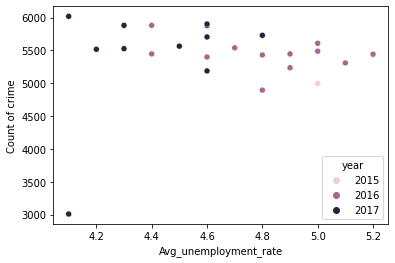

In [281]:
sns.scatterplot(y = 'Count of crime', 
                x = 'Avg_unemployment_rate', 
                hue = 'year', 
                data = unemploy_crime)
plt.show()

Look at the regression after remove the outlier located around (3000, 4)

In [282]:
# Locate and remove the outlier
print(np.where((unemploy_crime['Count of crime']<3500) & (unemploy_crime['Avg_unemployment_rate']<4.2)))
unemploy_crime.iloc[24]
unemploy_crime.drop(unemploy_crime.index[24],inplace = True)

(array([24]),)


The regression shows that with the increase in average unemployment rate, the count of crime is expected to decrease.

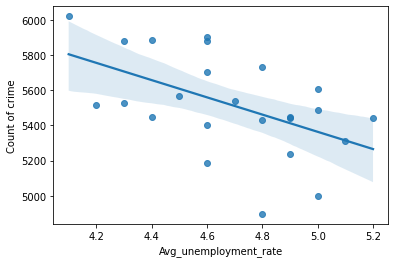

In [283]:
sns.regplot(y = 'Count of crime', 
            x = 'Avg_unemployment_rate', 
            data = unemploy_crime,
            ci = 95)
plt.show()

**Observation in police office and crime**

Add a column whether the location has a police office or not (1 means yes, 0 means no)

In [286]:
df_final['Police_Addr'].fillna(0,inplace = True)
police_office =[]
for i in df_final['Police_Addr']:
  if i == 0:
    police_office.append('No')
  else:
    police_office.append('Yes')

In [287]:
df_final['police_office'] = police_office

In [288]:
police_crime = pd.DataFrame(df_final.groupby('police_office')['INC NUMBER'].count()).reset_index()

In [290]:
police_crime.rename(columns = {'INC NUMBER':'Count of Crime'},inplace = True)

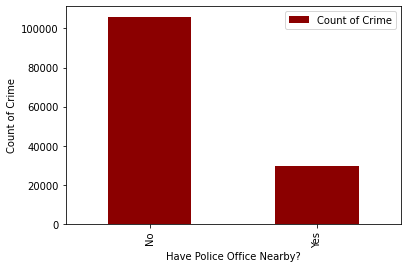

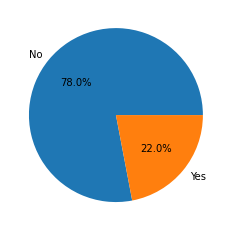

In [321]:
# Bar plot
police_crime.plot.bar( x = 'police_office', y ='Count of Crime',color = 'darkred')
plt.xlabel("Have Police Office Nearby?")
plt.ylabel("Count of Crime")
plt.show()
# Pie chart
police_crime['percentage'] = round(police_crime['Count of Crime']/np.sum(police_crime['Count of Crime']),2)
label = ['No','Yes']
plt.pie(police_crime['percentage'],labels = label,autopct='%.1f%%')
plt.show()

78% of all crime occured in somewhere has no police office, and 22% of all crime occured in somewhere has a police office. Therefore, whether there is a police office or not have impact on the crime rate, and building a police office at high crime area can lower the crime rate.